**Import package**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

**Import DataFile**

In [3]:
df = pd.read_csv("bestsellers with categories (1).csv")

In [4]:
df.head(20) # Displays the first five data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


**Cleaning Data**

In [5]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
df.info() #shows data file info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Text(0, 0.5, 'Frequency')

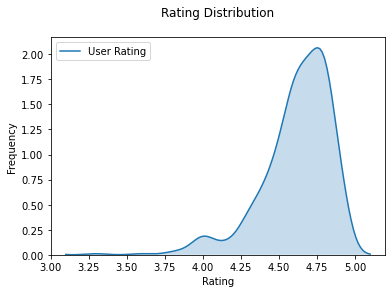

In [7]:
# ratings distribution
sns.kdeplot(df['User Rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

**TOP 10 Highest Rated Ficton Books**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

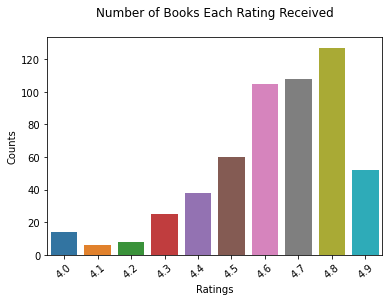

In [15]:
sns.barplot(df['User Rating'].value_counts().head(10).index, df['User Rating'].value_counts().head(10))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=40)


**Genre Pie chart**

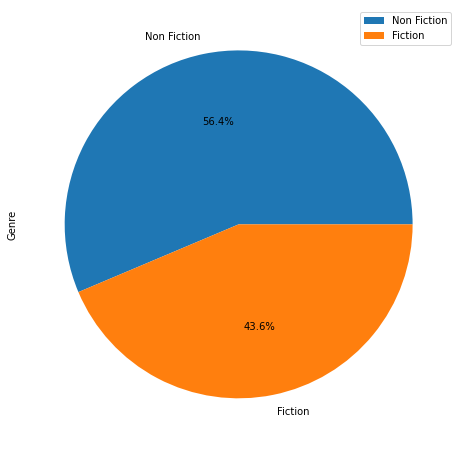

In [8]:
df['Genre'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

**Top 5 selling books**

In [10]:
top_sellingbooks = pd.DataFrame(df['Name'].value_counts().head(5))
top_sellingbooks.columns = ['Book count']
top_sellingbooks

,Book count
"Publication Manual of the American Psychological Association, 6th Edition",10
StrengthsFinder 2.0,9
"Oh, the Places You'll Go!",8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,7
The Very Hungry Caterpillar,7


In [44]:
df['Name']=='Publication Manual of the American Psychological Association, 6th Edition'


0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Name: Name, Length: 550, dtype: bool

**Number of best selling books sold per year**

In [11]:
Books_sold = pd.DataFrame(df['Year'].value_counts())
Books_sold.columns = ['Books sold']
Books_sold.index.name = 'Year'
Books_sold

,Books sold
Year,
2019,50
2018,50
2017,50
2016,50
2015,50
2014,50
2013,50
2012,50
2011,50


**Top 5 Most Reviewed Books**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

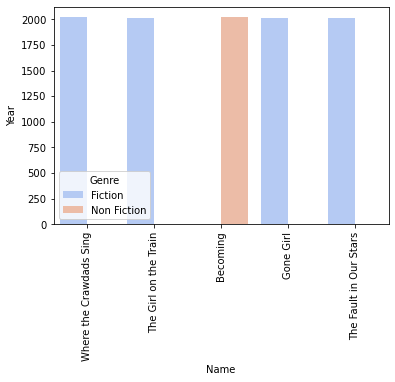

In [33]:
Top10_reviewed = df.sort_values(by='Reviews', ascending=False).head(10)
sns.barplot(y="Year", x= 'Name', hue= 'Genre', data=Top10_reviewed, palette='coolwarm')
plt.xticks(rotation = 90)

**TOP 10 Best Selling Authors**

In [13]:
Bestselling_Auth = pd.DataFrame(df['Author'].value_counts().head(10))
Bestselling_Auth.columns=['']
Bestselling_Auth.index.name='Author'
Bestselling_Auth

,
Author,
Jeff Kinney,12
Suzanne Collins,11
Rick Riordan,11
Gary Chapman,11
American Psychological Association,10
Gallup,9
Dr. Seuss,9
Rob Elliott,8
Eric Carle,7


In [16]:
df.sort_values(by='Price', ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction


In [20]:
df[df['Year']==2009]

,Name,Author,User Rating,Reviews,Price,Year,Genre
14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
25,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
50,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
60,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction
92,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

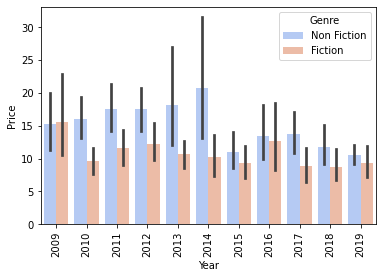

In [27]:
sns.barplot(x="Year", y= 'Price', hue="Genre", data=df, palette='coolwarm')
plt.xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

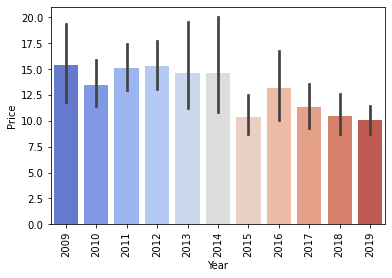

In [26]:
sns.barplot(x="Year", y= 'Price', data=df, palette='coolwarm')
plt.xticks(rotation = 90)
